In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

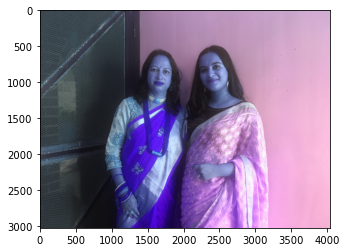

In [18]:
#load the image file
img = cv2.imread("./images/abc.jpg") 
plt.imshow(img)

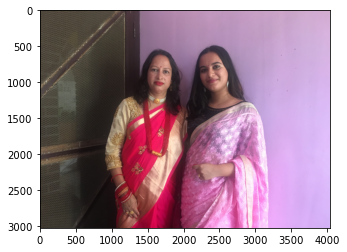

In [19]:
#opencv reads the color channels as BGR so convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


# Converting Image to GrayScale


To make computation faster and simpler, RGB images are converted to grayscale. Usually, color doesnot help in identifying the features.


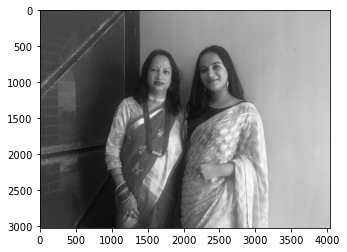

In [20]:
#converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #img used so BGR to GRAY
plt.imshow(gray, cmap = 'gray')


# Smooth the Image or Noise Removal

Oftentimes a smoothing filter is applied to the image to reduce the noise of an image. Image noise is random changes in brightness in the image. It is usually the grainy parts of your photograph. The effect of smoothing your image is making your image more blurry. A popular smoothing filter that is used is the Gaussian filter.

The higher the value of sigma, the more information you are removing

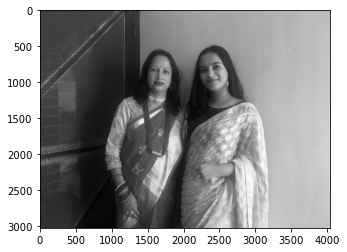

In [21]:
blur = cv2.GaussianBlur(gray,(5,5),2)
plt.imshow(blur, cmap = 'gray')


# Edge Detection

The edges of an image are the parts of an image where the brightness changes quickly. To detect the edges of an image, we need to compute something called the gradient magnitude of an image. The gradient magnitude of an image measures how quickly the image is changing and it is used for edge detection.
To get the gradient magnitude of an image, we need to calculate the verticle and horizontal components of the gradient of the image. In other words, we need to calculate how much the image changes in the horizontal direction (the x component of the gradient),  𝑑𝑥 , and the verticle direction (the y component of the gradient),  𝑑𝑦 . To calculate how much the image changes in the each direction, we apply a filter called the Sobel filter to the images. 



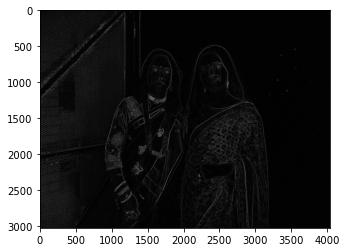

In [22]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5) # Change in horizonal direction, dx
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5) # Change in verticle direction, dy
gradmag_sq = np.square(sobelx)+np.square(sobely) # Square the images element-wise and then add them together 
gradmag = np.sqrt(gradmag_sq) # Take the square root of the resulting image element-wise to get the gradient magnitude

plt.imshow(gradmag, cmap ='gray')

We will now reverse colors of the gradient magnitude of the image. In other words, we want to make the light regions dark and the dark regions light. Lighter regions have a pixel value closer to 255, which is the value for white, and darker regions have a pixel value closer to 0, which is the value for black. To reverse the colors of the gradient magnitude we will replace every pixel value with the pixel value subtracted from 255 since 255 is the maximum possible pixel value in a grayscale image.

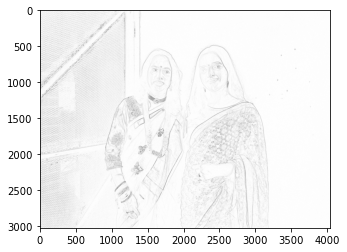

In [23]:
gradmag_inv = 255-gradmag # Reverse the colors in the image
plt.imshow(gradmag_inv, cmap = "gray")


# Get the Threshold of the image

Thresholding is a method used to turn an image from grayscale (pixel value from 0 - 255) into a binary image. A binary image is an image where every pixel has one of two possible values, usually a value of 0 (black) or 255 (white). The way the algorithm typically works is that for given threshold value that ranges from 0 to 255, if the pixel value is less than the threshold value it is mapped to 0 (black) and if the pixel value is greater than the threshold value then the pixel value is mapped to the maximum value, usually 255 (white).

If you want to have a sketch of your photo where the only colors are black and white, you can take the threshold of your image.

The parameters of this method are src, thres, maxval and type. src is a grayscale image, thres is your threshold value, maxval is the maximum value you are assigning to a pixel and type is the type of thresholding you want to use. As you will see in the code cell below, the threshold value we have set is 10, the maximum value is 255 and the thresholding method we have set is cv2.THRESH_BINARY. cv2.THRESH_BINARY just indicates that if the pixel value is less than the threshold value then set the value to 0, otherwise set the value to 255.

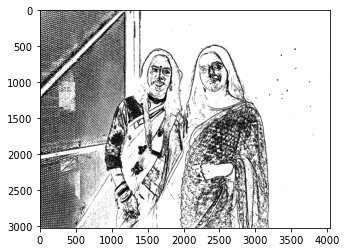

In [24]:
thresh_value, thresh_img = cv2.threshold(gradmag_inv,10,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap = 'gray')

cv2.pencilSketch() is used for creating the Pencil Sketch art. It takes the following parameters:

sigma_s, a value from 0-200, determines how smooth you want the resulting image to become. The higher the value of sigma_s the smoother the image.

sigma_r, a value from 0-1, determines how much you want different colors in your image to be blended. A small sigma_r value indicates that you only want regions of similar color to be smooth while the different colors remain intact. This parameter is important when you want to preserve the edges of an image when you are smoothing it.

The shade_factor is a value between 0-0.1. The higher the value of the shade_factor the brighter the image.

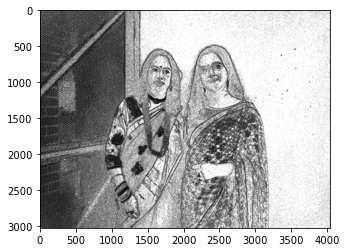

In [28]:
pencilsketch_gray, pencilsketch_color  = cv2.pencilSketch(img_rgb, sigma_s=60, sigma_r=0.04, shade_factor=0.05) 

plt.imshow(pencilsketch_gray, cmap ='gray') # To plot the black and white pencil sketch

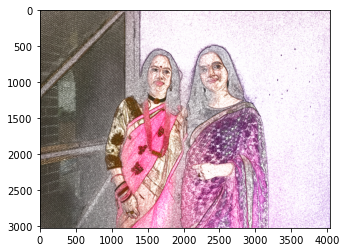

In [29]:
plt.imshow(pencilsketch_color) # To plot the color pencil sketch

# Water Color Painting Effect

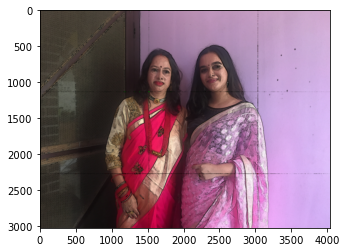

In [30]:
#cv2.stylization() gives water color painting effect
waterpainting = cv2.stylization(img_rgb, sigma_s=3, sigma_r=3)
plt.imshow(waterpainting)